In [1]:
library(ggplot2)

# install.packages('ggthemes')
library(ggthemes)

# paquete para graficar matrices de correlación:
#install.packages('corrplot')
library(corrplot)

# paquete para graficar matrices de correlación:
# install.packages('corrgram')
library(corrgram)

# pquete para particionar datos para prueba y entrenamiento:
# install.packages('caTools')
library(caTools)

# Paquete para guardar el modelo entrenado en formato RDS:
# install.packages("readr")
library(readr)

library(dplyr)

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv('data_ML/student-mat.csv', sep=";")
head(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

### Verificamos si las columnas tienen registros nulos

In [4]:
cols <- colnames(df)
cols

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [5]:
# Creamos función que regresa el número de campos nulos por columna:
df_nulls <- function(df){
    cols <- colnames(df)
    
    vec_nulls <- c()
    for(c in cols){
        vec_nulls <- append(vec_nulls, sum(is.na(df$c)))
    }

    return(vec_nulls)
}

In [6]:
data.frame(campos = cols, n_nulos = df_nulls(df))

campos,n_nulos
<chr>,<int>
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0


### Seleccionamos las variables numéricas

In [7]:
numeric_cols <- sapply(df, is.numeric)
numeric_cols

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE       TRUE      FALSE      FALSE      FALSE       TRUE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
      TRUE      FALSE      FALSE      FALSE      FALSE       TRUE       TRUE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
      TRUE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE       TRUE       TRUE       TRUE       TRUE       TRUE 
    health   absences         G1         G2         G3 
      TRUE       TRUE       TRUE       TRUE       TRUE

In [8]:
df_numeric <- df[numeric_cols]
head(df_numeric)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
2,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
3,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
4,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
5,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
6,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


### Calculamos matriz de correlaciones

In [9]:
correlation <- cor(df_numeric)
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


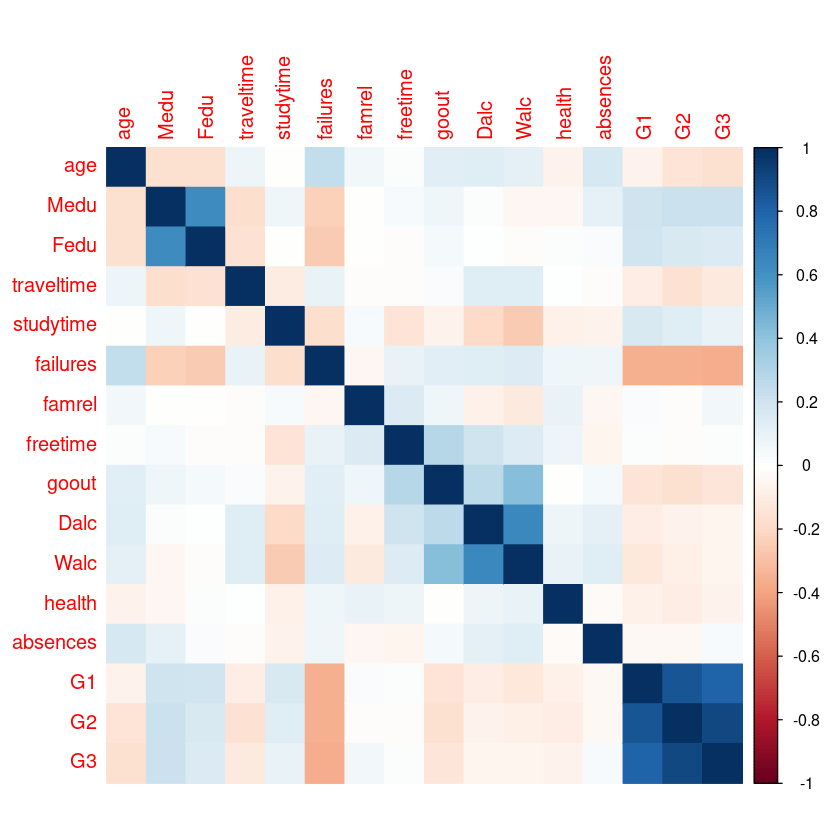

In [10]:
# Create a corrgram
corrplot(correlation, method = 'color')

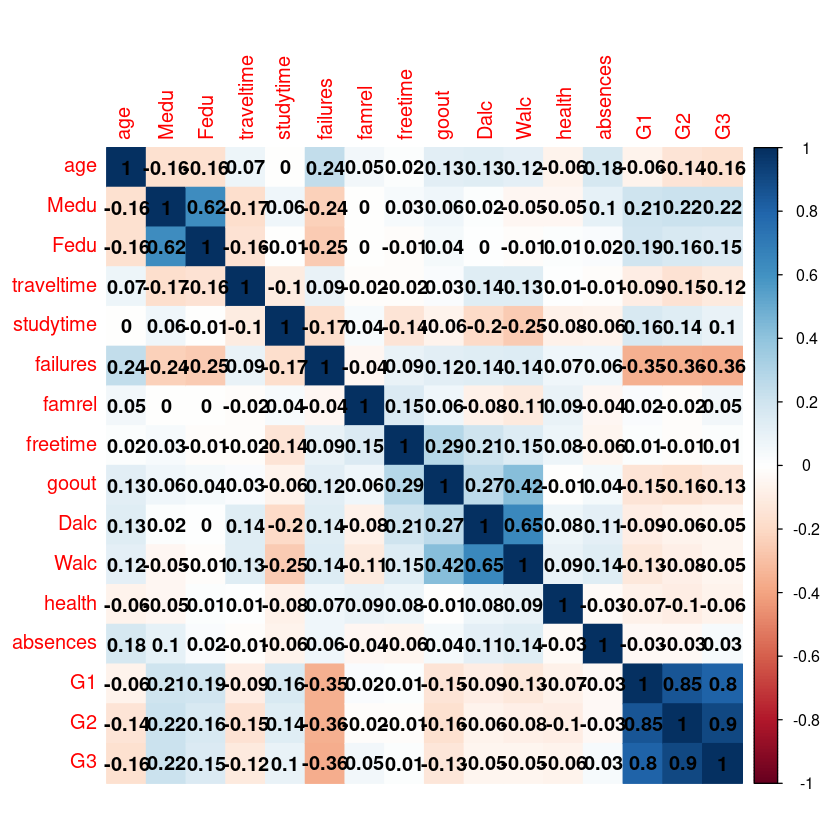

In [11]:
# Create a corrgram
corrplot(correlation,
         # Using the color method for a heatmap
         method = 'color',
         # And the lower half only for easier readability
         type = 'full',
         # Omit the 1's along the diagonal to bring variable names closer
         diag = TRUE,
         # Add the number on top of the color
         addCoef.col = 'black'
         )

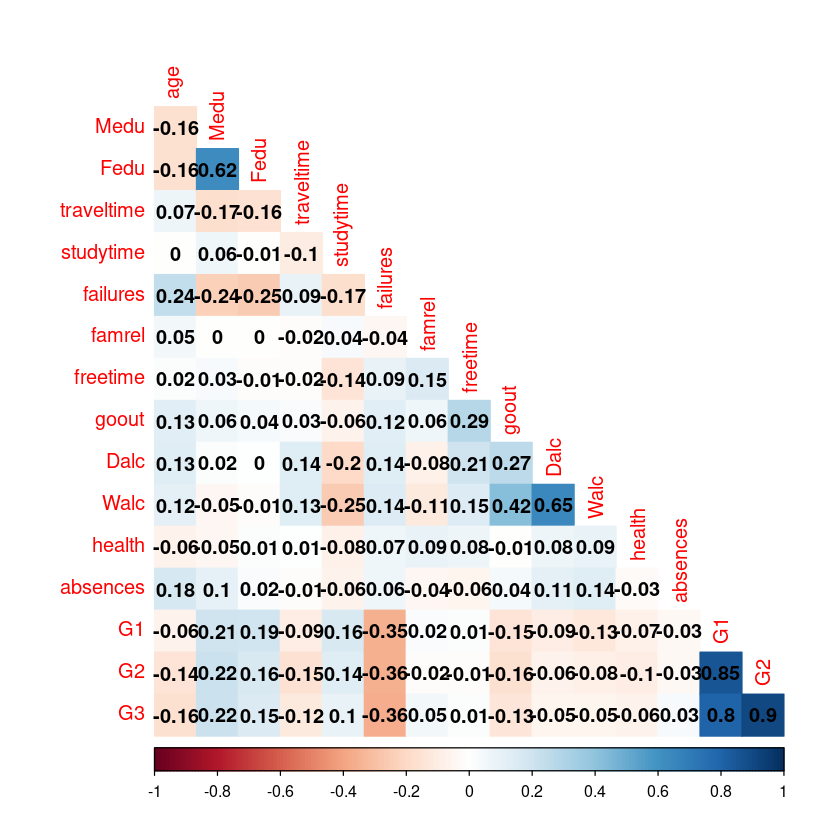

In [12]:
# Create a corrgram
corrplot(correlation,
         # Using the color method for a heatmap
         method = 'color',
         # And the lower half only for easier readability
         type = 'lower',
         # Omit the 1's along the diagonal to bring variable names closer
         diag = FALSE,
         # Add the number on top of the color
         addCoef.col = 'black'
         )

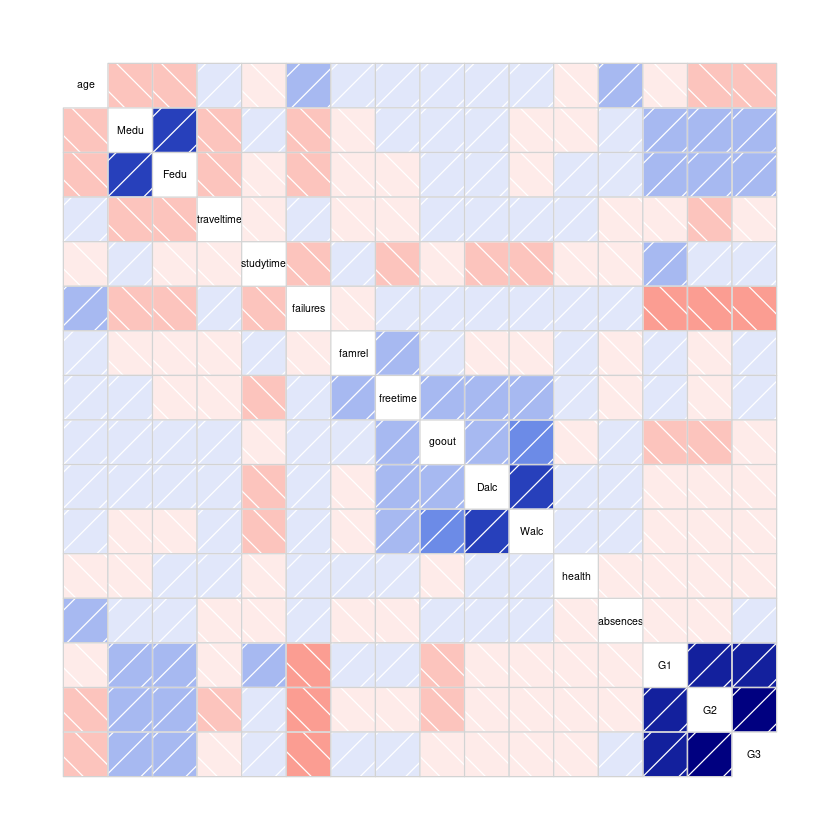

In [13]:
corrgram(correlation)

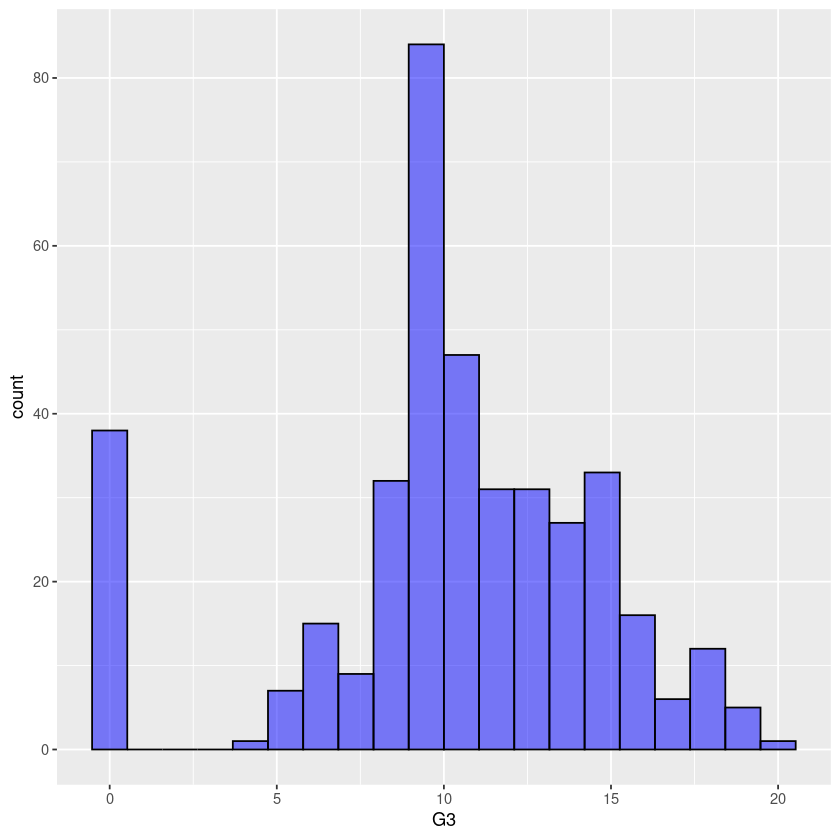

In [14]:
ggplot(df, aes(x=G3)) + geom_histogram(bins=20, color='black', fill='blue' ,alpha=0.5)

## Separamos datos para prueba y entrenamiento

In [15]:
# establecemos una semilla para que se preserve la configuración del particionamiento de datos:
set.seed(80)
p_train <- 0.7 #  <-- Porcentaje para datos de entrenamiento
booleans <- sample.split( df$G3, SplitRatio = p_train )

In [16]:
df_train <- subset( df, booleans == TRUE)
head(df_train)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [17]:
df_test <- subset( df, booleans == FALSE)
head(df_test)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
10,GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,14,15,15
27,GP,M,15,U,GT3,T,2,2,other,other,⋯,4,2,2,1,2,5,2,12,12,11
28,GP,M,15,U,GT3,T,4,2,health,services,⋯,2,2,4,2,4,1,4,15,16,15
34,GP,M,15,U,LE3,T,3,3,other,other,⋯,5,3,2,1,1,2,0,8,10,12
37,GP,M,15,U,LE3,T,4,3,teacher,services,⋯,5,4,3,1,1,4,2,15,16,18


In [18]:
nrow(df)

[1] 395

In [19]:
nrow(df_train) + nrow(df_test)

[1] 395

## Modelado

In [20]:
# Variable a estimar (label): "G3"
modelo <- lm(G3 ~. , df_train)

In [21]:
summary(modelo)


Call:
lm(formula = G3 ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3169 -0.4283  0.2962  1.0233  4.2819 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.02105    2.61550  -0.773  0.44046    
schoolMS          0.87187    0.48346   1.803  0.07261 .  
sexM              0.13046    0.28993   0.450  0.65315    
age              -0.10444    0.13075  -0.799  0.42524    
addressU          0.14813    0.33742   0.439  0.66106    
famsizeLE3       -0.11979    0.29004  -0.413  0.67998    
PstatusT         -0.48749    0.41538  -1.174  0.24175    
Medu              0.15320    0.18461   0.830  0.40748    
Fedu             -0.22236    0.15602  -1.425  0.15542    
Mjobhealth       -0.60243    0.61662  -0.977  0.32958    
Mjobother        -0.26084    0.42594  -0.612  0.54088    
Mjobservices     -0.55666    0.45395  -1.226  0.22133    
Mjobteacher      -0.29158    0.61701  -0.473  0.63696    
Fjobhealth        0.13798    0.807

* `Residuals` <-- indica los residuos entre los datos observados y los aproximados por el modelo.
* `Coefficients:`
    * `Estimate` <-- Indica los coeficientes aproximados para el modelo de regresión lineal $y = b_{1}+a_{1}x_{1}+...+a_{n}x_{n}$
    * `Std. Error` <-- Indica el error +- de la estimación
    * `Pr(>|t|)` <-- indica la probabilidad de que el campo no sea relevante, es decir, entre más grande sea ese valor menos relevante es el campo.
    * `t value` <-- indica la puntación para saber si un coeficiente es significativo o no para el modelo

* `Adjusted R-squared` <-- Valor entre 0 y 1 que indica la precisión del modelo

### Calculamos residuos del modelo

In [22]:
residuals <- residuals(modelo)
df_residuals <- as.data.frame(residuals)
head(df_residuals)

,residuals
,<dbl>
1,0.9349204
2,1.5308295
3,1.2716170
4,1.7883341
5,1.0233777
6,-1.4216529


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


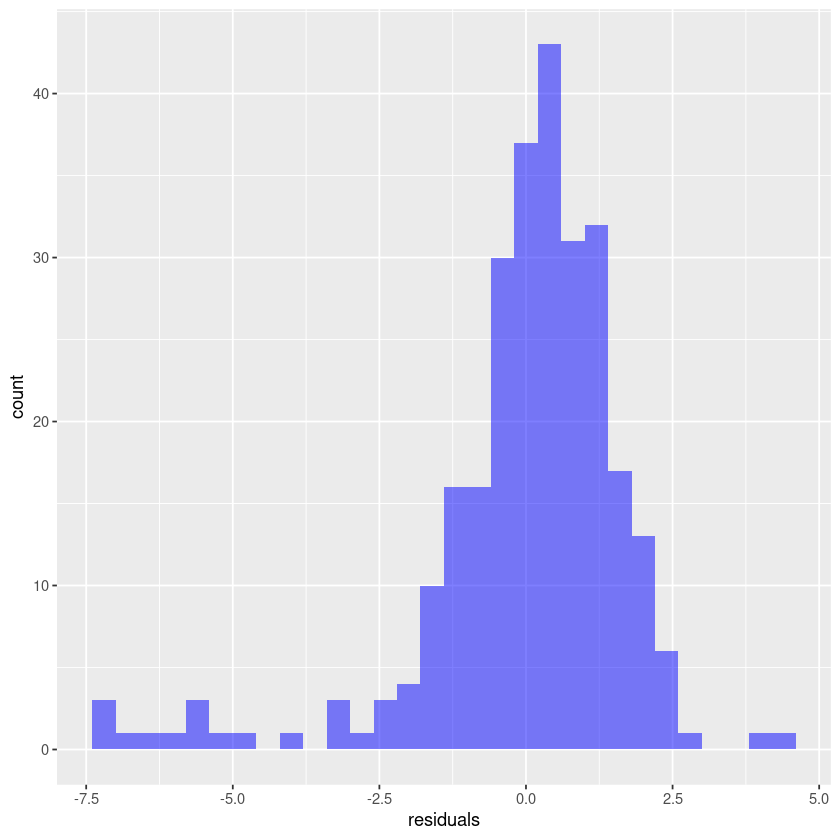

In [23]:
ggplot(df_residuals, aes(residuals)) + geom_histogram( fill ="blue", alpha = 0.5)

En base al histograma anterior podemos ver que la mayoría de los errores son cercanos a `0`, es decir, es un buen modelo.

## Gráficos del modelo

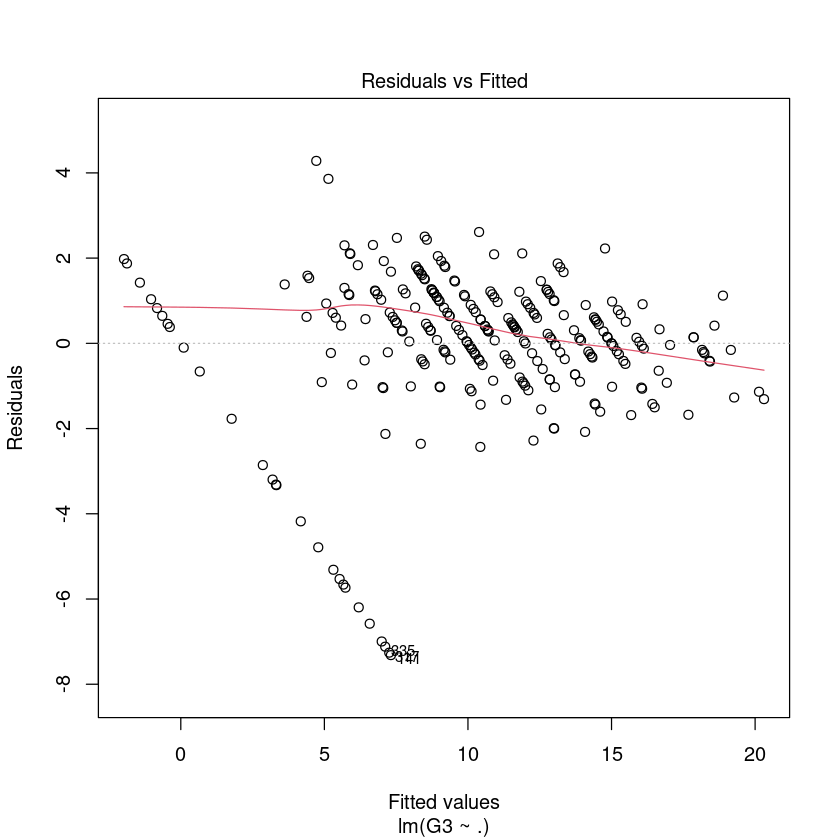

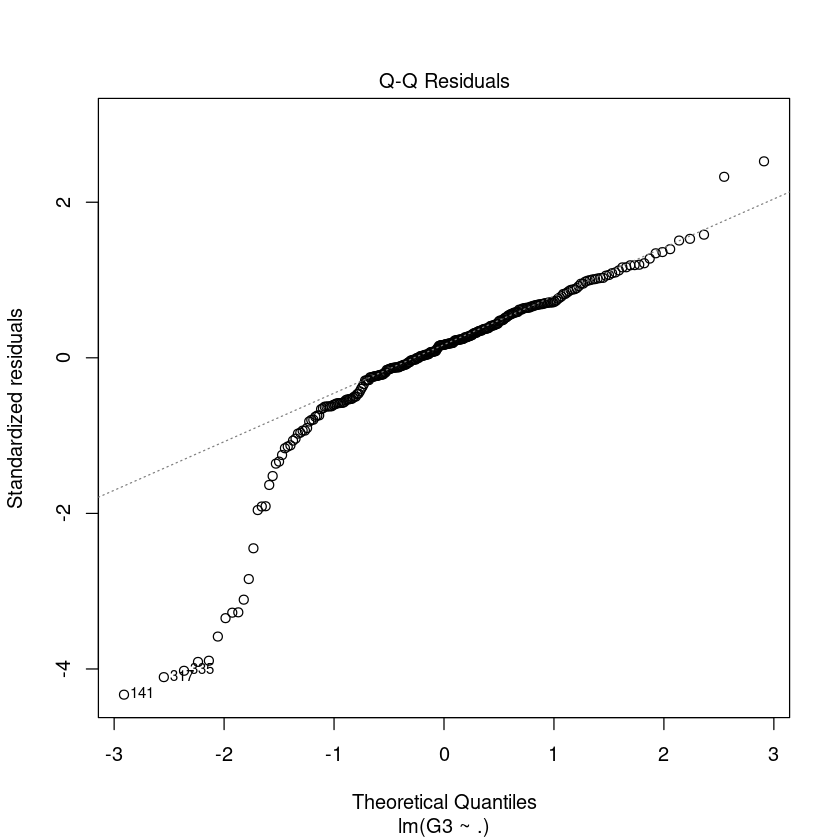

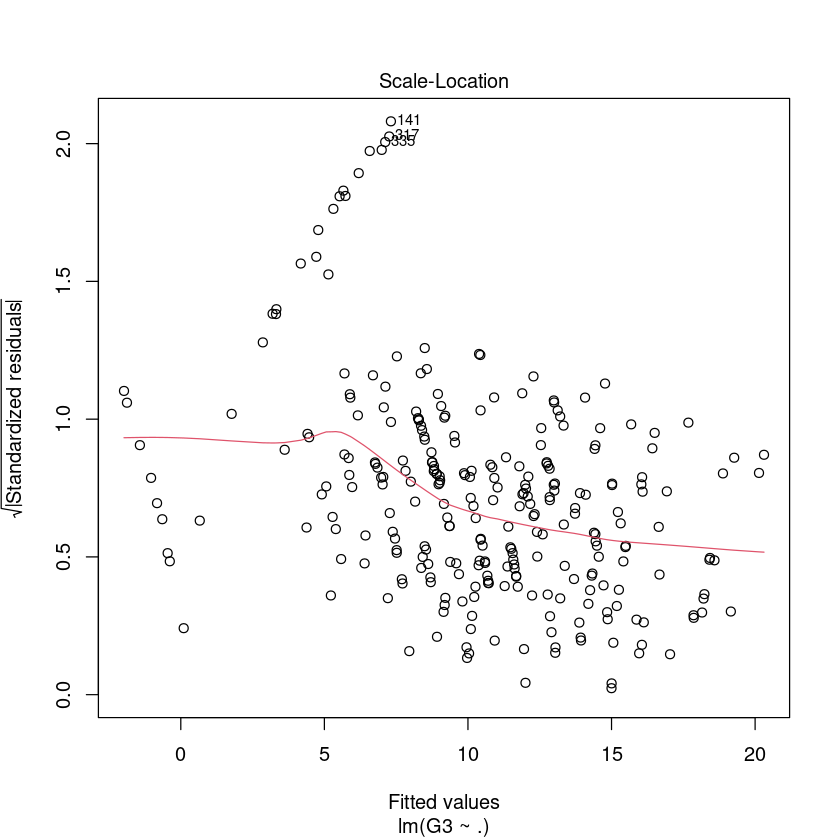

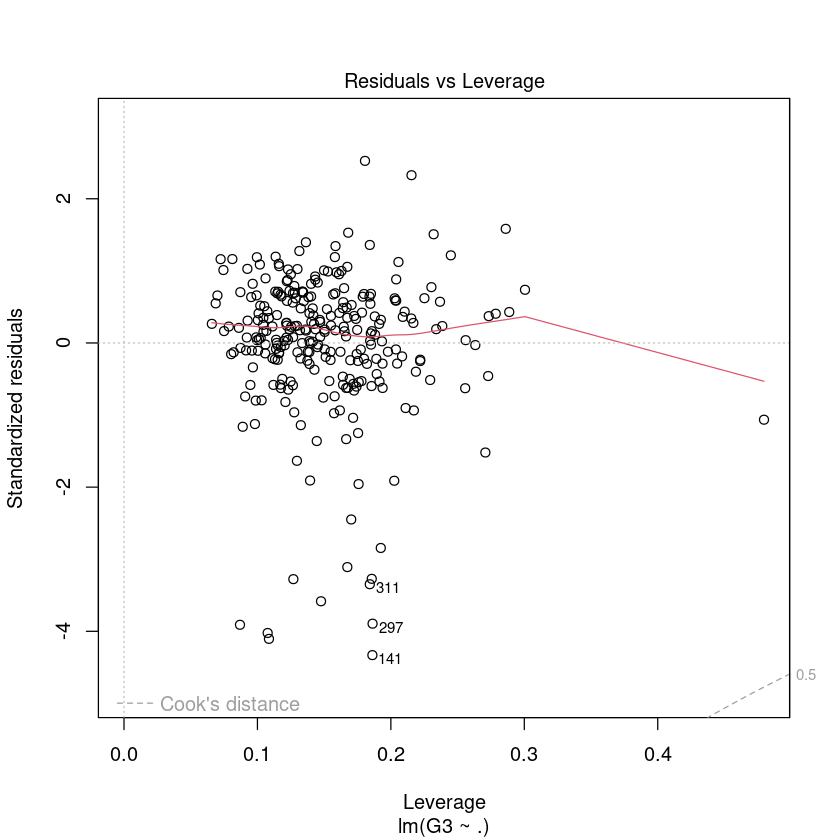

In [24]:
plot(modelo)

## Evaluación con datos de prueba

In [25]:
obs_G3 <- df_test$G3
approx_G3 <- predict(modelo, df_test)

In [26]:
df_resultados <- data.frame(obs_G3,approx_G3)
head(df_resultados)

,obs_G3,approx_G3
,<int>,<dbl>
8,6,4.377117
10,15,15.656878
27,11,12.771523
28,15,16.365528
34,12,8.963185
37,18,16.382029


In [27]:
rms_error <- mean( (df_resultados$approx_G3 - df_resultados$obs_G3)^2 )
rms_error

[1] 4.565135

In [28]:
sse <- sum( (df_resultados$approx_G3 - df_resultados$obs_G3)^2 )
sst <- sum( (mean(df$G3) - df_resultados$obs_G3)^2 )

precision <- 1- sse/sst
precision

[1] 0.7763538

In [29]:
index = 1:nrow(df_resultados)
data_to_plot <- ggplot(df_resultados, aes(x=index))
#data_to_plot

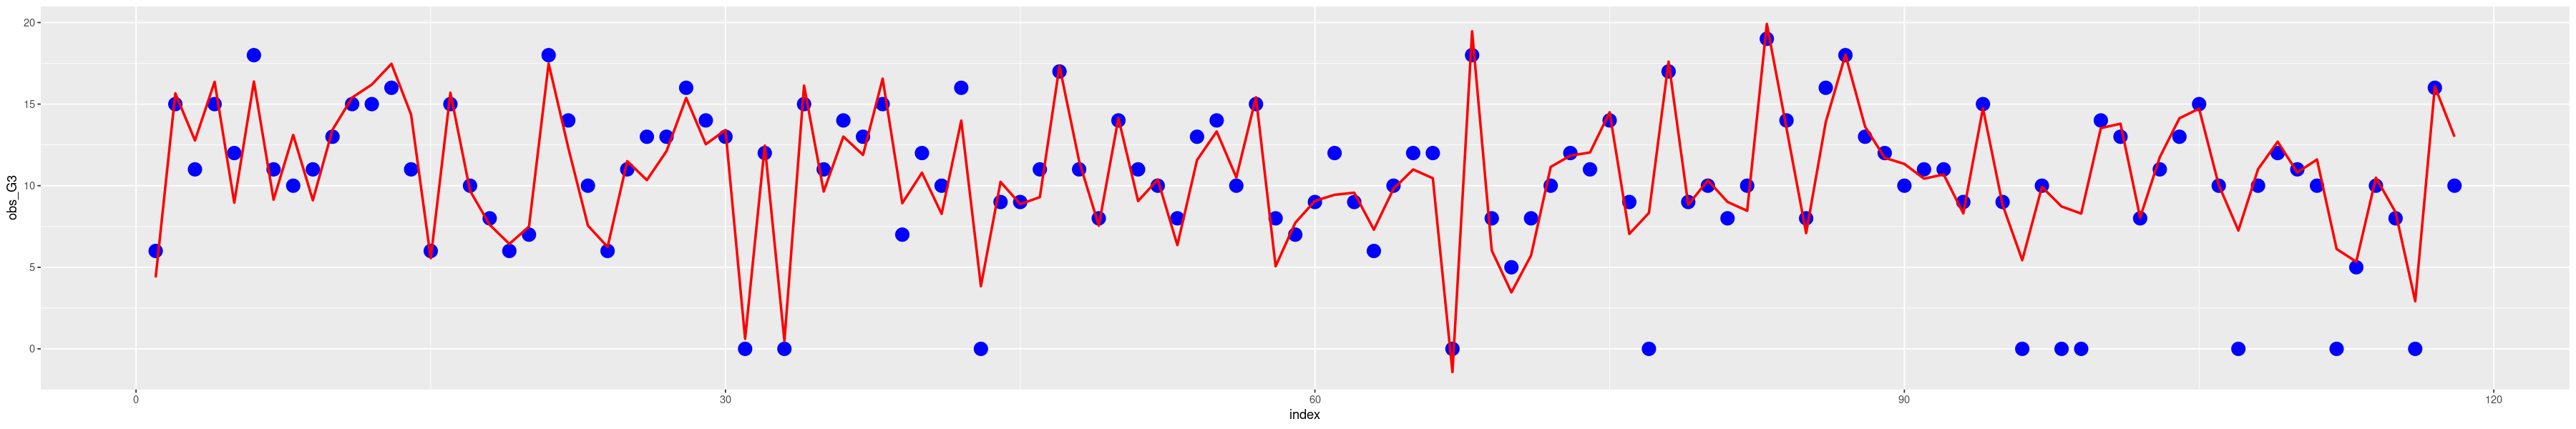

In [30]:
options(repr.plot.width=30, repr.plot.height=5)
plt_obs <- data_to_plot + geom_point(aes(y=obs_G3), size=5, color="blue") + geom_line(aes(y=approx_G3), linewidth=1 ,color="red")
plt_obs

## Guardamos algunos artifactos y modelo entrenado

In [31]:
version_model <- 1.1

artifacts <- list( df_test , modelo)

In [32]:
ruta_save_model <- paste("data_ML/artifacts_model_lr_",version_model,".rds", sep="")
ruta_save_model

[1] "data_ML/artifacts_model_lr_1.1.rds"

In [33]:
# Guardamos el artifactos en el archivo
saveRDS(artifacts, file = ruta_save_model)

saveRDS(version_model, file = "data_ML/current_version_model.rds")

## Cargamos artifactos para realizar predicciones

In [34]:
# Cargamos el modelo desde el archivo
artifactos_cargados <- readRDS(file = ruta_save_model)

In [35]:
df_test2 <- artifactos_cargados[[1]]
class(df_test2)

[1] "data.frame"

In [36]:
head(df_test2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
10,GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,14,15,15
27,GP,M,15,U,GT3,T,2,2,other,other,⋯,4,2,2,1,2,5,2,12,12,11
28,GP,M,15,U,GT3,T,4,2,health,services,⋯,2,2,4,2,4,1,4,15,16,15
34,GP,M,15,U,LE3,T,3,3,other,other,⋯,5,3,2,1,1,2,0,8,10,12
37,GP,M,15,U,LE3,T,4,3,teacher,services,⋯,5,4,3,1,1,4,2,15,16,18


In [37]:
model2 <- artifactos_cargados[[2]]
class(model2)

[1] "lm"

In [38]:
summary(model2)


Call:
lm(formula = G3 ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3169 -0.4283  0.2962  1.0233  4.2819 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.02105    2.61550  -0.773  0.44046    
schoolMS          0.87187    0.48346   1.803  0.07261 .  
sexM              0.13046    0.28993   0.450  0.65315    
age              -0.10444    0.13075  -0.799  0.42524    
addressU          0.14813    0.33742   0.439  0.66106    
famsizeLE3       -0.11979    0.29004  -0.413  0.67998    
PstatusT         -0.48749    0.41538  -1.174  0.24175    
Medu              0.15320    0.18461   0.830  0.40748    
Fedu             -0.22236    0.15602  -1.425  0.15542    
Mjobhealth       -0.60243    0.61662  -0.977  0.32958    
Mjobother        -0.26084    0.42594  -0.612  0.54088    
Mjobservices     -0.55666    0.45395  -1.226  0.22133    
Mjobteacher      -0.29158    0.61701  -0.473  0.63696    
Fjobhealth        0.13798    0.807

In [39]:
obs2_G3 <- df_test2$G3
approx2_G3 <- predict(model2, df_test2)